In [1]:
%pip install --upgrade pip
%pip install scikit-learn
%pip install pandas


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Learning about the **dataset**

In [2]:
# @title reading the dataset, and spliting it to avoid mental overfit

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("train.csv")

exploratory_df = df[:int((len(df)/100)*75)]

Looking at the general picture from the dataset

In [3]:
# @title getting the variable names and types from the dataset

exploratory_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [4]:
# title Getting some examples of the data
exploratory_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
# title Getting usefull statistics about the dataset
exploratory_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6380.000000,6375.000000,6376.000000,6356.000000,6385.000000,6366.000000
mean,28.857210,225.144941,456.916092,173.494808,309.110258,304.102105
std,14.622366,665.228718,1652.120631,555.379327,1134.195856,1143.142331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,48.000000,69.000000,25.250000,56.000000,43.750000
max,79.000000,14327.000000,29813.000000,12253.000000,22408.000000,24133.000000


In [6]:
# @title CryoSleep influence on Transported

exploratory_df.groupby("CryoSleep")["Transported"].value_counts(normalize=True)

CryoSleep  Transported
False      False          0.659872
           True           0.340128
True       True           0.816871
           False          0.183129
Name: proportion, dtype: float64

In [7]:
# Getting the amount of missing data
exploratory_df.isna().sum()

PassengerId       0
HomePlanet      148
CryoSleep       159
Cabin           154
Destination     138
Age             139
VIP             145
RoomService     144
FoodCourt       143
ShoppingMall    163
Spa             134
VRDeck          153
Name            158
Transported       0
dtype: int64

In [8]:
# @title Getting the amount of each target class
exploratory_df['Transported'].value_counts()

Transported
True     3336
False    3183
Name: count, dtype: int64

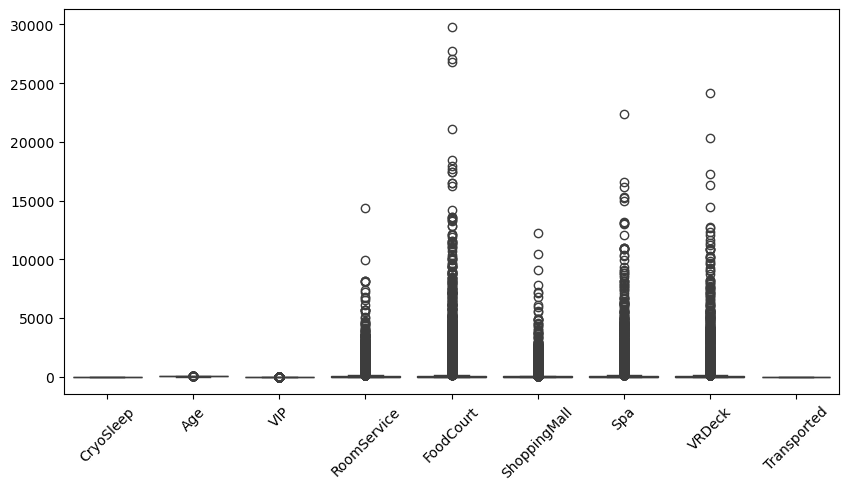

In [9]:
# @title Searching for outliers with a boxplot chart

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=exploratory_df)
plt.xticks(rotation=45)
plt.show()

Important observations:

*   The dataset is balanced
*   The amount of missing data is very low
*   The outliers are mainly on the luxury expenses



In [10]:
# @title Looking at CryoSleep passangers

exploratory_df[exploratory_df["CryoSleep"] == 1]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6505,6864_02,Europa,True,A/71/P,55 Cancri e,25.0,NaN,0.0,0.0,0.0,0.0,0.0,Phamark Scoudelle,True
6507,6865_02,Europa,True,D/208/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,Errim Peducting,True
6514,6879_01,Earth,True,G/1119/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Joyces Englence,True
6516,6880_02,Mars,True,E/457/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Gacke Mepie,False


In [11]:
# @title Looking at CryoSleep passangers

exploratory_df[exploratory_df["Transported"] == 1]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,6866_01,Europa,False,C/253/S,55 Cancri e,20.0,False,0.0,17958.0,99.0,14.0,57.0,Gork Hetforhaft,True
6512,6871_01,Earth,False,G/1116/S,TRAPPIST-1e,38.0,False,190.0,1.0,616.0,0.0,NaN,Faithy Rickson,True
6513,6873_01,Europa,False,A/72/P,55 Cancri e,62.0,False,362.0,1049.0,46.0,104.0,829.0,Mesarix Hervel,True
6514,6879_01,Earth,True,G/1119/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Joyces Englence,True


**Finding and creating good features**

In [12]:
# @title Transforming all the features in numbers

from sklearn.preprocessing import LabelEncoder

numeric_features = exploratory_df.select_dtypes(include=['int64', 'float64']).columns
object_features = exploratory_df.select_dtypes(include=['object']).columns

numeric_exploratory_df = exploratory_df.copy()

numeric_exploratory_df[object_features] = numeric_exploratory_df[object_features].apply(LabelEncoder().fit_transform)
numeric_exploratory_df["Transported"] = numeric_exploratory_df["Transported"].apply(lambda x: int(x))

In [13]:
# title Getting the linear correlation of the dataset items
numeric_exploratory_df.corr()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,1.000000,0.000069,-0.000675,-0.002661,-0.003899,-0.009301,-0.001848,0.001327,-0.016583,0.032129,-0.010009,0.024066,0.002101,0.078734
HomePlanet,0.000069,1.000000,0.071367,-0.423921,0.033419,0.124404,0.040894,0.197678,0.055407,0.094277,0.042385,0.033936,0.023426,0.103071
CryoSleep,-0.000675,0.071367,1.000000,0.108272,-0.082728,-0.070605,-0.019728,-0.224494,-0.177883,-0.203039,-0.179966,-0.175658,0.005432,0.399447
Cabin,-0.002661,-0.423921,0.108272,1.000000,0.108644,-0.240674,-0.043104,-0.071523,-0.259389,-0.070189,-0.179657,-0.213961,0.013054,-0.037980
Destination,-0.003899,0.033419,-0.082728,0.108644,1.000000,-0.005345,-0.018335,0.032789,-0.106950,0.029614,-0.056092,-0.071012,-0.010328,-0.098288
Age,-0.009301,0.124404,-0.070605,-0.240674,-0.005345,1.000000,0.027700,0.071298,0.134578,0.034606,0.132038,0.097763,-0.027920,-0.070515
VIP,-0.001848,0.040894,-0.019728,-0.043104,-0.018335,0.027700,1.000000,0.025650,0.058306,-0.008776,0.005793,0.041814,-0.000305,-0.011817
RoomService,0.001327,0.197678,-0.224494,-0.071523,0.032789,0.071298,0.025650,1.000000,-0.008284,0.068582,0.002074,-0.017756,0.031078,-0.242074
FoodCourt,-0.016583,0.055407,-0.177883,-0.259389,-0.106950,0.134578,0.058306,-0.008284,1.000000,-0.015879,0.221684,0.223573,-0.018329,0.054257
ShoppingMall,0.032129,0.094277,-0.203039,-0.070189,0.029614,0.034606,-0.008776,0.068582,-0.015879,1.000000,0.002363,-0.000219,-0.021884,0.009079


Notes:
  * The value spent on luxury services is moderately correlated with the target value.
  * The cabins must be 'disassembled' in order to extract any information.
  * CryoSleep seems to be an very important factor


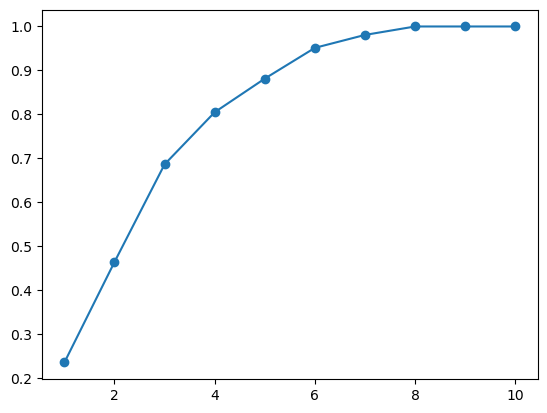

In [14]:
# @title Checking if a 2d chart is a relaible way to see the data.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=10)
pca_dataset = pca.fit_transform(numeric_exploratory_df.dropna().drop(columns=["Transported"]))


plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', label='Cumulative Variance')


Clearly, the pca plot would not be realiable. let's find another way to see the correlations of the variables

In [15]:
# @title Mutual information:

from sklearn.feature_selection import mutual_info_classif

numeric_exploratory_df_without_na = numeric_exploratory_df.dropna()

X = numeric_exploratory_df_without_na.drop(columns=["Transported"])
y = numeric_exploratory_df_without_na["Transported"]

mutual_info = mutual_info_classif(X, y)

mutual_info_dict = zip(X.columns, mutual_info)
mutual_info_dict = sorted(mutual_info_dict, key=lambda x: x[1], reverse=True)

for feature, mutual_information in mutual_info_dict:
    print(f"{feature}: {mutual_information}")

CryoSleep: 0.10567798522648353
Spa: 0.07742458609577407
RoomService: 0.07137215055383717
VRDeck: 0.06348571550509674
ShoppingMall: 0.045114245814424025
FoodCourt: 0.04479939515457354
Cabin: 0.026514093438992026
Name: 0.024126184583184163
PassengerId: 0.022915728598249974
HomePlanet: 0.01865904564293408
Age: 0.004943740685793951
Destination: 0.0
VIP: 0.0


It seems that the money spent on the space ship luxury services are correlated to the target variable.

Let's make some features:

---

* total_spent: Spa + RoomService + VRDeck + ShoppingMall + FoodCourt

---

* deck: Just split from the Cabin
* room_number: Just split from the Cabin
* ship_side: Just split from the Cabin

---

* last_name: The passager last name

In [16]:
def create_features(df):
  df["total_spent"] = df["Spa"] + df["RoomService"] + df["VRDeck"] + df["ShoppingMall"] + df["FoodCourt"]
  df["deck"] = df["Cabin"].str.split("/").str[0]
  df["room_number"] = df["Cabin"].str.split("/").str[1]
  df["ship_side"] = df["Cabin"].str.split("/").str[2]
  df["last_name"] = df['Name'].str.split(" ").str[1]
  return df

df_with_feature_engineering = exploratory_df.copy()
df_with_feature_engineering = create_features(df_with_feature_engineering)

In [17]:
# @title Transforming all the features in numbers

from sklearn.preprocessing import LabelEncoder

numeric_features = df_with_feature_engineering.select_dtypes(include=['int64', 'float64']).columns
object_features = df_with_feature_engineering.select_dtypes(include=['object']).columns

numeric_df_with_feature_engineering = df_with_feature_engineering.copy()

numeric_df_with_feature_engineering[object_features] = numeric_df_with_feature_engineering[object_features].apply(LabelEncoder().fit_transform)
numeric_df_with_feature_engineering["Transported"] = numeric_df_with_feature_engineering["Transported"].apply(lambda x: int(x))

In [18]:
# @title Mutual information of the created features:

from sklearn.feature_selection import mutual_info_classif

numeric_exploratory_df_without_na = numeric_df_with_feature_engineering.dropna()

X = numeric_exploratory_df_without_na.drop(columns=["Transported"])
y = numeric_exploratory_df_without_na["Transported"]

mutual_info = mutual_info_classif(X, y)

mutual_info_dict = zip(X.columns, mutual_info)
mutual_info_dict = sorted(mutual_info_dict, key=lambda x: x[1], reverse=True)

for feature, mutual_information in mutual_info_dict:
    print(f"{feature}: {mutual_information}")

total_spent: 0.12747209166647555
CryoSleep: 0.10315253485398346
RoomService: 0.07371134648239042
Spa: 0.06071937278229522
VRDeck: 0.05648302889248824
ShoppingMall: 0.045353062022540414
FoodCourt: 0.04147054209891543
Cabin: 0.026407936022226686
Name: 0.023059268016795365
deck: 0.02234423507598504
PassengerId: 0.021950859225400743
last_name: 0.0183643791863084
VIP: 0.01628859339714106
HomePlanet: 0.013462082056295843
ship_side: 0.012689047568658074
room_number: 0.0060217870858898515
Destination: 0.0
Age: 0.0


Hypotheses:

  * People in CryoSleep have a higher chance of being Transported.

  * People who spend large amounts of money have a lower chance of being Transported.

  * The main expense correlated with Teleportation is Room Service.

  * Room number, ship side, and deck do not seem to be relevant to the problem.

Possibly, people who were in their rooms during the incident were teleported to the other dimension. This effect was not caused by their position relative to the ship.

# Training the model

Chosen models:

* Random Forest - A good general model for almost every tabular problem, and it's training is a little bit faster than XGBoost on smaller datasets

* MLP - A good model for complex tasks when you have a lot of data

In [19]:
def create_features(df):
  df_with_features = df.copy()
  df_with_features["total_spent"] = df_with_features["Spa"] + df_with_features["RoomService"] + df_with_features["VRDeck"] + df_with_features["ShoppingMall"] + df_with_features["FoodCourt"]
  return df_with_features

In [20]:
# @title Getting the data, and adding the created features

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("train.csv")

features = ["CryoSleep", "RoomService", "Spa", "VRDeck", "ShoppingMall", "FoodCourt"]
features_float = ["CryoSleep", "RoomService", "Spa", "VRDeck", "ShoppingMall", "FoodCourt"]

X = df[features].copy()
y = df["Transported"]

# Criando nova feature
X = create_features(X)

# Realizando o split corretamente usando os dados com a nova feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [ ]:
# @title Training a MLP Model

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=500000, early_stopping=True, random_state=42))
])

param_grid = {
    'mlp__hidden_layer_sizes': [
        (200, 70),
        (200, 70, 200),
        (200, 70, 200, 70),
        (200, 70, 200, 70, 200),
        (200, 70, 200, 70, 200),
    ],
    'mlp__activation': ['tanh', 'logistic', 'relu', 'identity'],
    'mlp__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'mlp__solver': ['adam'],
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'mlp__alpha': [ 0.000000000001, 0.00000000001, 0.00000000001, 0.0000000001],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=7)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

print("Confusion Matrix", confusion_matrix(y_test, y_pred))
print(classification_report(y_pred, y_test))
print("Best Params: ", grid_search.best_params_)
print("Train Accuracy: ", grid_search.score(X_train, y_train))
print("Test Accuracy: ", grid_search.score(X_test, y_test))

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


In [45]:
# Submitting the result
import pandas as pd

df = pd.read_csv("test.csv")

X = df[features].copy()
X = create_features(X)

y_pred = grid_search.predict(X)

submission = pd.DataFrame({'PassengerId': df['PassengerId'], 'Transported': y_pred})
submission.to_csv('submission.csv', index=False)
